# Importing Libraries

In [1]:
# tools for handling n dimentional data or martix type of data
import numpy as np
import pandas as pd

# tools for EDA and data visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (4,3)
plt.rcParams['font.family'] = 'sans-serif'

# for data pre-processing
import category_encoders as ce 
from sklearn.preprocessing import StandardScaler, RobustScaler

# for sampling or cross-validation or data partitioning
from sklearn.model_selection import train_test_split

# for modelling
from sklearn.tree import DecisionTreeClassifier # ExtraTreeClassifier can also be taken from sklearn.tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,IsolationForest
from sklearn.svm import SVC, LinearSVC, OneClassSVM
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
# for model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,ConfusionMatrixDisplay,RocCurveDisplay,plot_confusion_matrix,roc_curve,roc_auc_score

In [2]:
data = pd.read_csv("network_traffic.csv",delimiter=";")
data

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,Zsone,0,0,0,0,0,0,2,2,257,143,NaN,NaN,NaN,2,2,malicious
7841,Zsone,4,4,1,296,0,0,5,1,86,382,NaN,NaN,NaN,5,1,malicious
7842,Zsone,0,0,0,0,0,0,2,2,257,143,NaN,NaN,NaN,2,2,malicious
7843,Zsone,0,0,0,0,0,0,2,2,257,143,NaN,NaN,NaN,2,2,malicious


In [3]:
classes = list(data.type.value_counts().index)
classes

['benign', 'malicious']

# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7845 non-null   object 
 1   tcp_packets           7845 non-null   int64  
 2   dist_port_tcp         7845 non-null   int64  
 3   external_ips          7845 non-null   int64  
 4   vulume_bytes          7845 non-null   int64  
 5   udp_packets           7845 non-null   int64  
 6   tcp_urg_packet        7845 non-null   int64  
 7   source_app_packets    7845 non-null   int64  
 8   remote_app_packets    7845 non-null   int64  
 9   source_app_bytes      7845 non-null   int64  
 10  remote_app_bytes      7845 non-null   int64  
 11  duracion              0 non-null      float64
 12  avg_local_pkt_rate    0 non-null      float64
 13  avg_remote_pkt_rate   0 non-null      float64
 14  source_app_packets.1  7845 non-null   int64  
 15  dns_query_times      

In [5]:
data.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times
count,7845.000000,7845.000000,7845.000000,7.845000e+03,7845.000000,7845.000000,7845.000000,7845.000000,7.845000e+03,7.845000e+03,0.0,0.0,0.0,7845.000000,7845.000000
mean,147.578713,7.738177,2.748502,1.654375e+04,0.056724,0.000255,152.911918,194.706310,2.024967e+05,1.692260e+04,NaN,NaN,NaN,152.911918,4.898917
std,777.920084,51.654222,2.923005,8.225650e+04,1.394046,0.015966,779.034618,1068.112696,1.401076e+06,8.238182e+04,NaN,NaN,NaN,779.034618,18.900478
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,6.900000e+01,NaN,NaN,NaN,1.000000,0.000000
25%,6.000000,0.000000,1.000000,8.880000e+02,0.000000,0.000000,7.000000,7.000000,9.340000e+02,1.046000e+03,NaN,NaN,NaN,7.000000,1.000000
50%,25.000000,0.000000,2.000000,3.509000e+03,0.000000,0.000000,30.000000,24.000000,4.090000e+03,3.803000e+03,NaN,NaN,NaN,30.000000,3.000000
75%,93.000000,0.000000,4.000000,1.218900e+04,0.000000,0.000000,98.000000,92.000000,2.624400e+04,1.261000e+04,NaN,NaN,NaN,98.000000,5.000000
max,37143.000000,2167.000000,43.000000,4.226790e+06,65.000000,1.000000,37150.000000,45928.000000,6.823516e+07,4.227323e+06,NaN,NaN,NaN,37150.000000,913.000000


- there is a obvious presence of outliers in the data 
- this will be mostly usefull for detecting anomaly in data

# handling missing values

In [6]:
missing_values = pd.DataFrame({"missing values":data.isna().sum(),"% percentage":(data.isna().sum()/len(data)*100)})
missing_values = missing_values.sort_values(["missing values"],ascending=False)
missing_values = missing_values.style.background_gradient(cmap="Greens")
missing_values

,missing values,% percentage
avg_remote_pkt_rate,7845,100.000000
avg_local_pkt_rate,7845,100.000000
duracion,7845,100.000000
name,0,0.000000
source_app_bytes,0,0.000000
dns_query_times,0,0.000000
source_app_packets.1,0,0.000000
remote_app_bytes,0,0.000000
remote_app_packets,0,0.000000
tcp_packets,0,0.000000


In [7]:
data = data.drop(['duracion','avg_local_pkt_rate','avg_remote_pkt_rate'], axis=1)
data

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,7,1,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,Zsone,0,0,0,0,0,0,2,2,257,143,2,2,malicious
7841,Zsone,4,4,1,296,0,0,5,1,86,382,5,1,malicious
7842,Zsone,0,0,0,0,0,0,2,2,257,143,2,2,malicious
7843,Zsone,0,0,0,0,0,0,2,2,257,143,2,2,malicious


# Handling the object type of columns

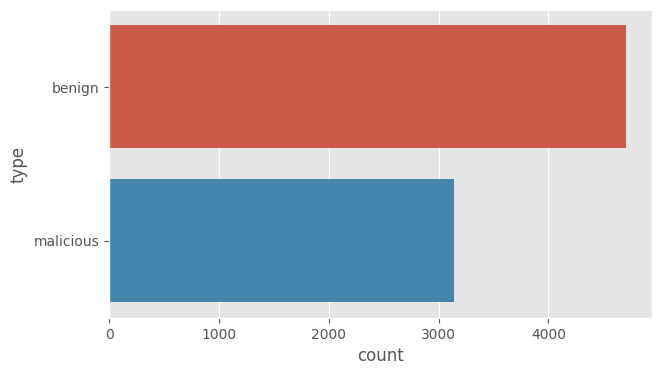

In [8]:
plt.figure(figsize=(7,4))
sns.countplot(y="type",data=data)
plt.show()

In [9]:
data.type.replace({"benign":0,"malicious":1},inplace=True)
data

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,39,3,0
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,128,11,0
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,205,9,0
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,7,1,0
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,Zsone,0,0,0,0,0,0,2,2,257,143,2,2,1
7841,Zsone,4,4,1,296,0,0,5,1,86,382,5,1,1
7842,Zsone,0,0,0,0,0,0,2,2,257,143,2,2,1
7843,Zsone,0,0,0,0,0,0,2,2,257,143,2,2,1


In [10]:
data.name.value_counts()

Reading             774
Plankton            483
DroidKungFu         427
AntiVirus           396
NewsAndMagazines    360
                   ... 
Saiva                 1
Gmuse                 1
EICAR-Test-File       1
EWalls                1
SafeKidZone           1
Name: name, Length: 114, dtype: int64

In [11]:
X = data.drop(columns=["type"])
y = data.type

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
le = ce.LeaveOneOutEncoder()
X_train_trans = le.fit_transform(X_train,y_train)
X_train_trans

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times
2412,0.0,22,0,1,3999,0,0,23,21,2247,4076,23,1
7203,1.0,222,0,3,47898,0,0,226,193,34513,48196,226,4
2459,0.0,1024,0,2,109220,0,0,1027,623,103274,109440,1027,3
5105,1.0,0,0,0,0,0,0,2,2,282,136,2,2
2122,0.0,17,0,2,2121,0,0,19,17,2113,2277,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,1.0,0,0,0,0,0,0,3,3,451,224,3,3
3264,0.0,13,0,2,1381,0,0,16,14,2471,1622,16,3
1653,0.0,32,6,3,5030,0,0,36,32,4452,5346,36,4
2607,0.0,29,0,3,7109,0,0,32,28,6157,7325,32,3


In [14]:
X_train_trans.name.value_counts()

0.000000    3781
1.000000    2469
0.397546      26
Name: name, dtype: int64

In [15]:
X_test_trans = le.transform(X_test)
X_test_trans

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times
6322,1.0,11,0,2,1009,0,0,13,6,956,1161,13,2
487,0.0,310,13,4,76942,0,0,315,295,39364,77309,315,5
1103,0.0,14,0,2,1897,0,0,16,15,6508,2044,16,2
2602,0.0,221,18,5,17022,0,0,225,381,477790,17326,225,4
7597,1.0,107,0,3,24081,0,0,110,101,11532,24306,110,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,42,0,1,7021,0,0,43,29,3994,7091,43,1
3380,0.0,163,0,5,20541,0,0,169,186,198927,20997,169,6
2586,0.0,571,0,3,87025,0,0,574,819,943949,87258,574,3
729,0.0,14,0,1,1819,0,0,15,12,1198,1894,15,1


# Case 2

In [16]:
data

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,39,3,0
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,128,11,0
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,205,9,0
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,7,1,0
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,Zsone,0,0,0,0,0,0,2,2,257,143,2,2,1
7841,Zsone,4,4,1,296,0,0,5,1,86,382,5,1,1
7842,Zsone,0,0,0,0,0,0,2,2,257,143,2,2,1
7843,Zsone,0,0,0,0,0,0,2,2,257,143,2,2,1


In [17]:
data_1  = data.copy()
data_1.drop(["name"],axis=1,inplace=True)

In [18]:
X = data_1.drop(["type"],axis=1)
y = data_1["type"]

scaler = StandardScaler()
X_trans = scaler.fit_transform(X)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
from time import perf_counter
import joblib
import os
from utils import *
from models import *
from config import *

100%|██████████| 8/8 [00:07<00:00,  1.12it/s]


best model: Random Forest


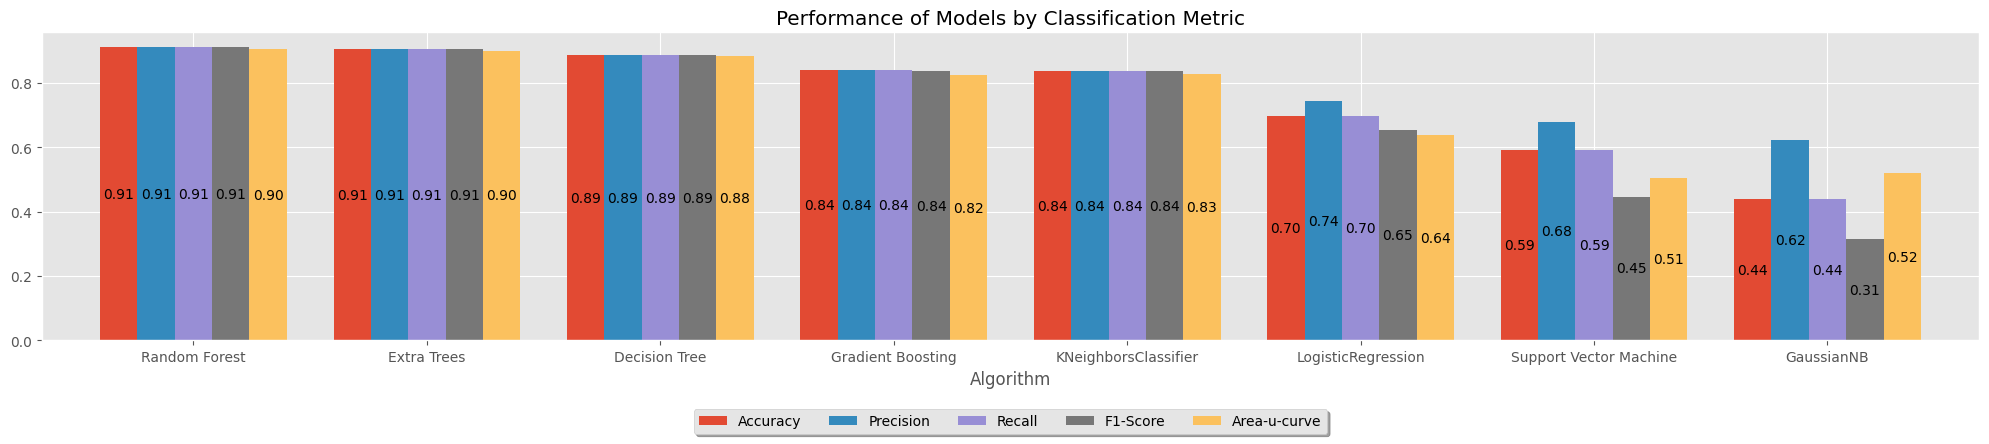

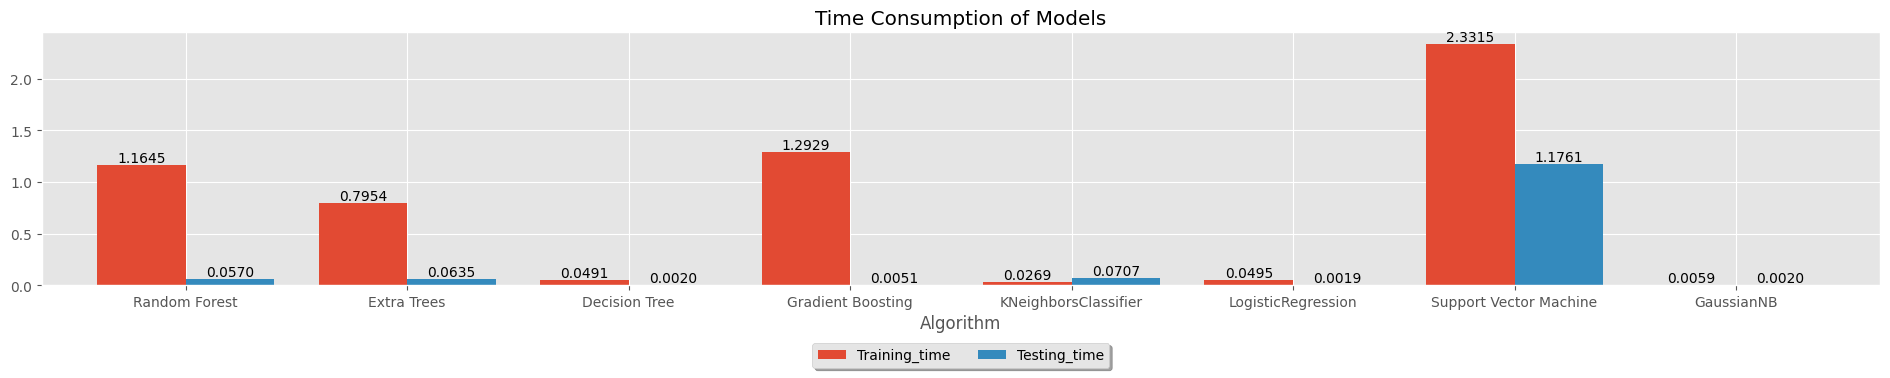

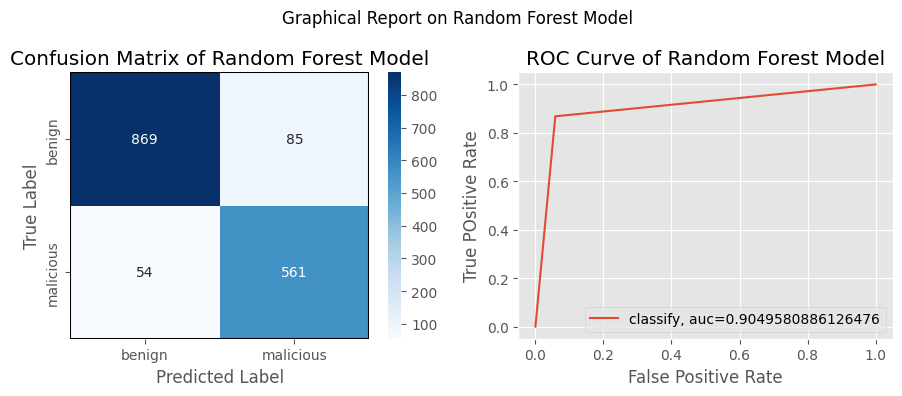

In [21]:

list_of_models=np.array([["Decision Tree",DecisionTreeClassifier(random_state=RANDOM_STATE)],
                         ["Random Forest",RandomForestClassifier(random_state=RANDOM_STATE)], 
                         ["Extra Trees",ExtraTreesClassifier(random_state=RANDOM_STATE)],
                         ["Gradient Boosting",GradientBoostingClassifier(random_state=RANDOM_STATE)], 
                         ["Support Vector Machine",SVC(random_state=RANDOM_STATE)], 
                         ["GaussianNB",GaussianNB()], 
                         ["KNeighborsClassifier",KNeighborsClassifier()], 
                         ["LogisticRegression",LogisticRegression()]])

results_df,best_model_name, best_model = experimentation(X_train,X_test,y_train,y_test,
                                                        list_of_models,
                                                        gen_report=True,
                                                        save_address="case2_best_model.h5")

y_pred = best_model.predict(X_test)
model_performance_graph_rep(y_test, y_pred, classes,best_model_name)